In [42]:
library(stats4) 
project = read.csv('bitcoin_price.csv')
data = matrix(ncol = 3, nrow = 1000)
data[,1] = project$Date[1:1000]
data[,2] = project$Close[1:1000]
data[1:1000,3] = log(project$Close[1001:2]/project$Close[1000:1])

In [43]:
my_fitdistr=function(x){
    n = length(x)
    sd0 <- sqrt((n-1)/n)*boot_strap_sd(x)
    mx <- boot_strap_mean(x)
    estimate <- c(mx, sd0)
    cat(n,mx,sd0)
    sds <- c(sd0/sqrt(n), sd0/sqrt(2*n))
    names(estimate) <- names(sds) <- c("mean", "sd")
    vc <- matrix(c(sds[1]^2, 0, 0, sds[2]^2), ncol = 2, dimnames = list(names(sds), names(sds)))
    return(structure(list(estimate = estimate, sd = sds, vcov = vc, n = n,
    loglik = sum(dnorm(x, mx, sd0, log=TRUE))),
                     class = "fitdistr"))
        }
boot_strap_sd=function(x){
    N = 10000
    K = 10000
    ret = c()
    i=1
    while(i<N){
        idx = sample(K,x,replace =TRUE)
        ret[i]=sd(x[idx])
        i=i+1
    }
    return ( mean(ret) )
}
boot_strap_mean=function(x){
    N = 10000
    K = 10000
    ret = c()
    i=1
    while(i<N){
        idx = sample(K,x,replace =TRUE)
        ret[i]=mean(x[idx])
        i=i+1
    }
    return ( mean(ret) )
}

In [44]:
my_fitdistr(test)

1000 NaN NA

  mean    sd 
  NaN     NA 
 ( NA)  ( NA)

In [45]:
plot_c = rev(data[,2])
test = data[,3]


In [46]:
library(MASS)
fitdistr(test,"normal")

       mean             sd      
  -0.0038724523    0.0398913766 
 ( 0.0012614761) ( 0.0008919983)

In [47]:
bitcoin_price = matrix(nrow=100, ncol = 100)
for( i in 1:100){
    bitcoin_price[i,1]=data[1,2]*exp ( rnorm(1,-0.0038724523,0.0398913766 ) )
}
for ( i in 2:100){
    for ( j in 1:100){
    bitcoin_price[j,i] = bitcoin_price[j,i-1]*exp ( rnorm(1,-0.0038724523,0.0398913766 ) )
    }
}


In [48]:
bitcoin_price

11803.08,11760.51,10587.98,9646.495,9369.937,8961.343,9191.353,8701.289,9215.990,9177.049,⋯,8059.222,8737.700,9051.810,9479.680,9258.147,9364.342,9722.059,9339.484,9357.845,9100.205
11212.03,11165.92,11658.21,11948.697,11478.346,11658.113,11354.716,10705.733,11235.794,10886.168,⋯,11453.691,10872.843,10293.271,11157.144,10772.239,11092.955,11450.372,11324.614,12162.459,12282.468
11881.12,11694.27,11273.92,12153.405,12483.258,12844.097,13332.359,13595.787,14251.584,13857.554,⋯,8053.583,6931.527,6594.729,6488.191,6030.363,5806.753,5795.213,6082.864,6334.524,6333.845
11464.01,11425.91,11333.95,11187.483,10718.594,10705.959,10384.183,11099.978,11736.817,11325.025,⋯,10901.375,10522.712,10884.908,10495.899,9628.419,9478.592,10046.741,10304.812,9609.121,9905.975
11505.19,11663.19,11889.21,11296.108,11099.217,10722.619,10270.387,9775.667,10551.016,10784.217,⋯,7124.756,6948.121,6620.174,6765.844,6685.981,6488.807,6704.859,6964.118,6833.329,6663.992
11564.78,11071.23,11551.03,11730.620,12008.171,11276.032,11390.538,11771.149,12451.371,12193.279,⋯,5185.575,5316.256,5332.947,4922.820,5051.259,5162.358,5021.686,5054.675,5595.997,5548.797
11296.24,10790.07,10470.99,10747.102,10612.794,9975.595,10814.013,10967.127,11041.501,10949.853,⋯,8839.874,8844.492,9378.519,8764.939,9285.255,9419.257,9062.564,8687.395,8647.911,7955.290
11080.83,11546.28,12088.41,11590.524,11316.350,11026.099,10242.046,10627.483,10736.039,10484.118,⋯,4917.807,4964.137,5165.925,5334.885,4921.258,4723.221,4680.127,4739.962,4734.144,4469.481
11640.57,12042.31,12269.49,11241.276,12272.291,11894.353,11478.642,11082.739,11297.567,11075.938,⋯,4289.925,4293.793,4207.889,4122.607,4379.255,4461.463,4361.360,4342.722,4561.682,4518.353
11843.63,11422.63,11158.46,11347.953,11092.623,10172.936,10225.530,10336.235,10199.001,10003.521,⋯,7576.202,7445.404,7523.123,7518.606,7517.003,7496.317,7796.298,7414.181,7263.364,7653.105
10713.68,10391.39,10071.91,10167.162,9820.800,9288.719,9336.504,8990.267,9256.073,9567.721,⋯,8134.460,7926.872,7517.629,7314.907,7003.303,6986.324,6948.751,7071.027,6952.621,7352.283


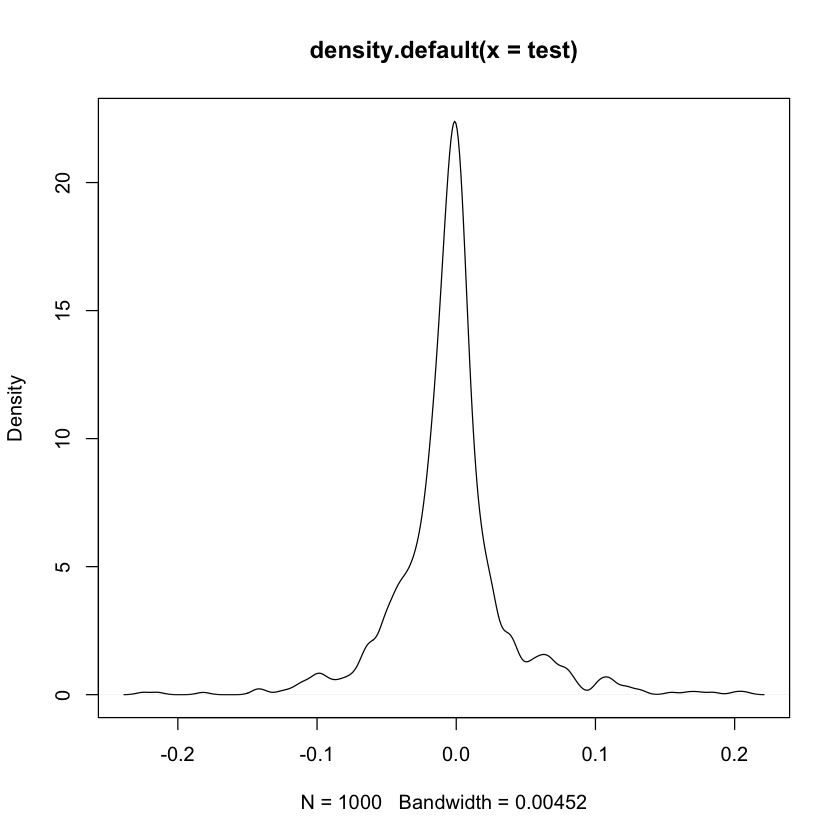

In [49]:
x = density(test)
plot(x,type="l")

In [50]:
fitdistr(test,"normal")

       mean             sd      
  -0.0038724523    0.0398913766 
 ( 0.0012614761) ( 0.0008919983)

In [51]:
#ks.test(test, "pnormal", mean=-0.0038724523, sd=0.0398913766)
hist_mean = -0.0038724523
hist_var = 0.0398913766 

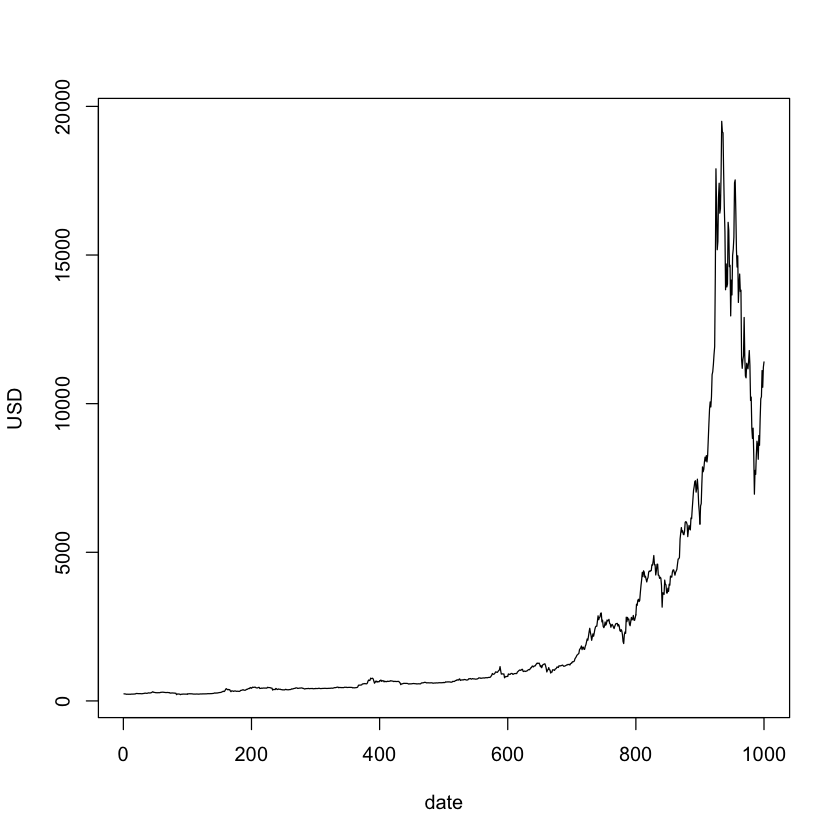

In [52]:
plot(plot_c,type="l",ylab="USD",xlab="date")

In [53]:
return = c()
return= data[1:1000, 3]
function1 = function(parameter) {  
  sigma = rep(NA,1000)
  sigma[1] = parameter[4]^2 
  for (i in 2:1000) {
    sigma[i] = (1-parameter[1]-parameter[2])*parameter[3]^2+parameter[1]*return[i-1]^2+
    parameter[2]*sigma[i-1]
    }
  densityf = rep(NA,1000)
  for(i in 1:1000){
    densityf[i] =(1/sqrt(2*pi*sigma[i]))*exp(-return[i]^2/(2*sigma[i]))
  }
-sum(log(densityf))
}
par1 = optim(c(0.1,0.5,0.01,0.01),function1)
cat("alpha, beta, sigma, sigma1 estimated",par1$par)
alpha = par1$par[1]
beta = par1$par[2]
sigmaimp = par1$par[3]
sigma1 = par1$par[4]

alpha, beta, sigma, sigma1 estimated 0.1526597 0.8234404 0.0426421 0.04006045

In [54]:
sigma1

[1] 0.04006045

In [55]:
#risk metric
sigma =c( rep(sigma1,1000))
  for (i in 2:1000) {
    sigma[i] = 0.94*return[i-1]^2+0.06*sigma[i-1]
    }
sigma_t1 = sqrt(0.94*sigma[1000]^2+0.06*return[1]^2)
sigma_forcast = c()

for (i in 1:100){
    sigma_forcast[i]=i*sigma_t1
}

In [56]:
sigma1

[1] 0.04006045

In [57]:
#garch
sigma =c( rep(sigma1,1000))
  for (i in 2:1000) {
    sigma[i] = (1-par1$par[1]-par1$par[2])*par1$par[3]^2+par1$par[1]*return[i-1]^2+
    par1$par[2]*sigma[i-1]
    }

sigma_t1 = sqrt(sigmaimp^2 + alpha*(return[1]^2 - sigmaimp^2)+beta*(sigma[1000]^2-sigmaimp^2))
sigma_forcast = c()
weight = c(rep(0,100))
weight[1] = 1
time = c(rep(0,100))
time[1] = 1
for(i in 2:100){
  weight[i] = (alpha+beta)*weight[i-1]
  time[i] = sum(weight)
}
for (i in 1:100){
  sigma_forcast[i] = sqrt(i*sigmaimp^2 + time[i]*(sigma_t1^2-sigmaimp^2))
}

In [58]:
my_rnorm=function(num){
    #apply bootstrap and jacknife here
    while(1){  
        ret=rnorm(num)
        ret_sd = sd(replicate(num,{mean(sample(ret,length(ret),replace=TRUE))}))
        while(ret_sd < -sqrt(1/num) || ret_sd >sqrt(1/num) ){
            print("worked!")
            #We want to see bootstrap actually worked
            ret=rnorm(num)
            ret_sd = sd(replicate(100,{mean(sample(ret,length(ret),replace=TRUE))}))
        }
        n = length(ret)
        ret.jack = numeric(n)
        for (i in 1:n){
            ret.jack[i] = mean(ret[-i])
        }
        bias.jack = (n-1)*(mean(ret.jack) - mean(ret))
        if(bias.jack==0)break
    }
    return(ret)
}

In [60]:
normal = my_rnorm(5000)
normal1 = matrix(nrow = 50, ncol = 100,normal)
return_2 = matrix(nrow = 50,ncol = 100)
bitcoin_price = matrix(nrow=50, ncol = 100)
for(i in 1:50){
  for(j in 1:100){
    return_2[i,j]=normal1[i,j]*sigma_forcast[j]
    bitcoin_price[i,j] = exp(return_2[i,j])*data[1,2]
  }
}

[1] "worked!"
[1] "worked!"
[1] "worked!"


In [63]:
return_2 = matrix(nrow = 100,ncol = 100)
bitcoin_price = matrix(nrow=100, ncol = 100)
for(i in 1:100){
    normal = rnorm(100)
    for(j in 1:100){
        return_2[i,j]=normal[j]*sigma_forcast[j]
        bitcoin_price[i,j] = exp(return_2[i,j])*data[1,2]
    }
}

In [20]:
#set.seed(8)
normal = rnorm(10000)
normal1 = matrix(nrow = 100, ncol = 100,normal)
return_2 = matrix(nrow = 100,ncol = 100)
bitcoin_price = matrix(nrow=100, ncol = 100)
for(i in 1:100){
  for(j in 1:100){
    return_2[i,j]=normal1[i,j]*sigma_forcast[j]
    bitcoin_price[i,j] = exp(return_2[i,j])*data[1,2]
  }
}

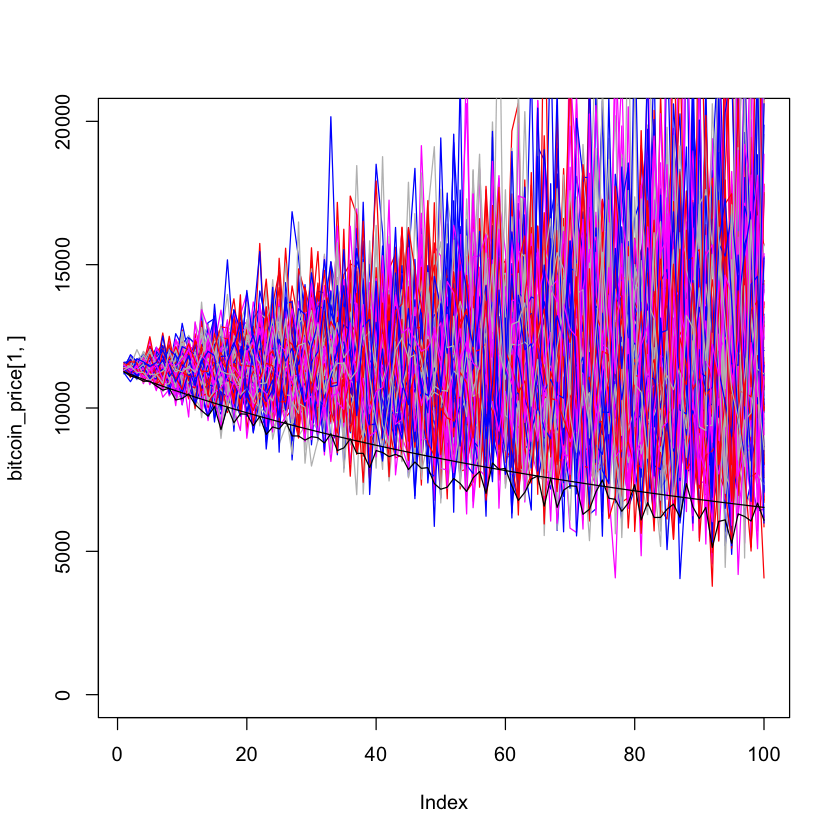

In [64]:
plot(bitcoin_price[1,],type="l",ylim=c(0,20000),col=1*2)
worst = c()
worst2 = c()
for ( i in 1:100){
    lines(bitcoin_price[i,],type="l",ylim=c(0,20000),col=i*2+200)
}
for ( i in 1:100){
    worst2[i] = exp(-1.645*sigma_forcast[i])*data[1,2]
    temp = sort(bitcoin_price[,i])
    worst = c(worst,(temp[3]+temp[4])/2)
}
lines(worst,type="l",ylim=c(0,20000),col="black")
lines(worst2,type="l",ylim=c(0,20000),col="black")


Call:
lm(formula = worst ~ days)

Residuals:
    Min      1Q  Median      3Q     Max 
-1127.8  -504.5    29.5   373.8  1526.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8938.02     116.91   76.45   <2e-16 ***
days          -59.01       2.01  -29.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 580.2 on 98 degrees of freedom
Multiple R-squared:  0.8979,	Adjusted R-squared:  0.8969 
F-statistic: 862.1 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = worst2 ~ days)

Residuals:
    Min      1Q  Median      3Q     Max 
-229.72 -186.43  -58.02  148.96  545.02 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10763.0395    42.2617  254.68   <2e-16 ***
days          -46.0963     0.7265  -63.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 209.7 on 98 degrees of freedom
Multiple R-squared:  0.9762,	Adjusted R-squared:  0.976 
F-statistic:  4025 on 1 and 98 DF,  p-value: < 2.2e-16


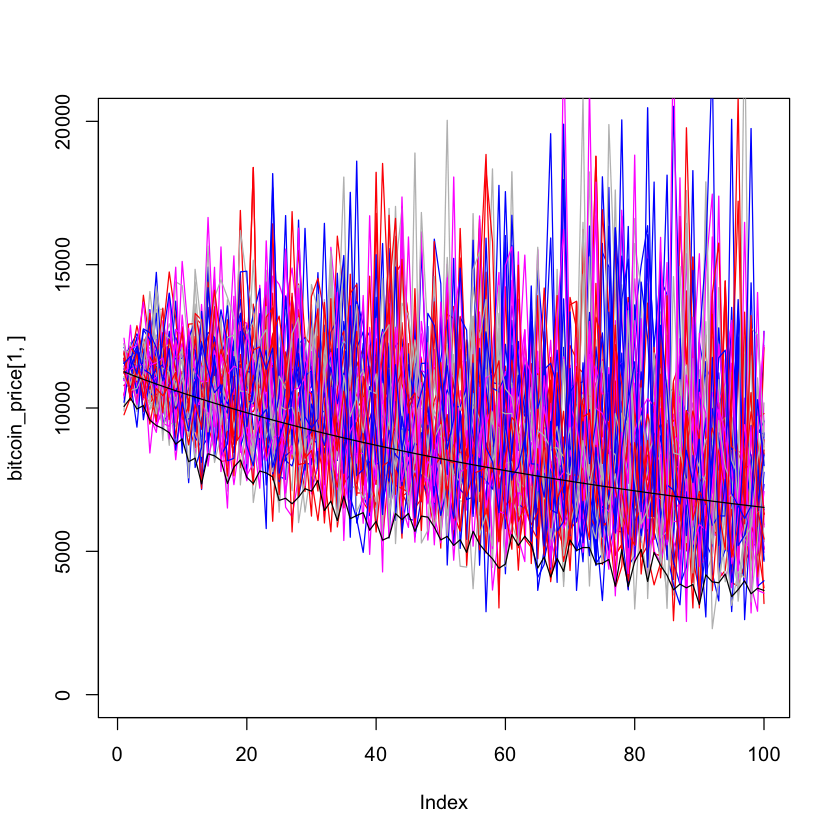

In [41]:
plot(bitcoin_price[1,],type="l",ylim=c(0,20000),col=1*2)
worst = c()
worst2 = c()
for ( i in 1:50){
    lines(bitcoin_price[i,],type="l",ylim=c(0,20000),col=i*2+200)
}
for ( i in 1:100){
    worst2[i] = exp(-1.645*sigma_forcast[i])*data[1,2]
    temp = sort(bitcoin_price[,i])
    worst = c(worst,(temp[2]+temp[3])/2 )
}
lines(worst,type="l",ylim=c(0,20000),col="black")
lines(worst2,type="l",ylim=c(0,20000),col="black")
days<-c(1:100)
reg1<-lm(worst~days)
summary(reg1)
reg2<-lm(worst2~days)
summary(reg2)

In [23]:
bitcoin_price = matrix(nrow=50, ncol = 100)
for(i in 1:100){
    for(j in 1:50){
        temp = rnorm(1,(hist_mean-0.5*hist_var^2)*i,hist_var*sqrt(i) )
        bitcoin_price[j,i] = exp(temp)*data[1,2]
    }
}

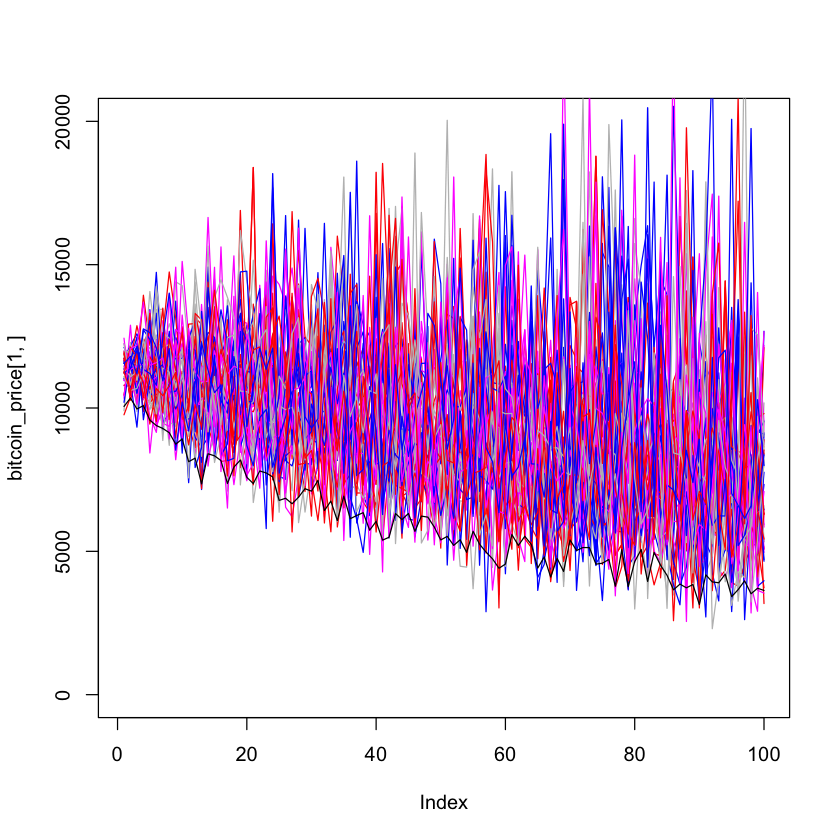

In [24]:
plot(bitcoin_price[1,],type="l",ylim=c(0,20000),col=1*2)
worst2 = c()
for ( i in 1:50){
    lines(bitcoin_price[i,],type="l",ylim=c(0,20000),col=i*2+200)
}
for ( i in 1:100){
    temp = sort(bitcoin_price[,i])
    worst2 = c(worst2,(temp[2]+temp[3])/2)
}
lines(worst2,type="l",col="black")

function (x, ...) 
UseMethod("mean")
<bytecode: 0x7fd5ecc8b808>
<environment: namespace:base>

ERROR: Error in model.frame.default(formula = worst ~ days, drop.unused.levels = TRUE): invalid type (NULL) for variable 'worst'
